# Question 3.
The dataset Boston from the library MASS consists of 506 median prices of owner-occupoed homes in $1000s (medv) in various places in Boston. Alongside with price, the dataset also provide various geographic and socio-economic information such as:

- crim -- per capita crime rate by town
- zn -- proportion of residential land zoned for lots over 25,000 sq.ft
- indus -- proportion of non-retail business acres per town
- chas -- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- nox -- nitrogen oxides concentration (parts per 10 million)
- rm -- average number of rooms per dwelling
- age -- proportion of owner-occupied units built prior to 1940
- dis -- weighted mean of distances to five Boston employment centres
- rad -- index of accessibility to radial highways
- tax -- full-value property-tax rate per $10,000
- ptratio -- pupil-teacher ratio by town
- black -- 1000(Bk−0.63)^2 where Bk is the proportion of blacks by town
- lstat -- lower status of the population (percent)

The goal is to find the relations between these factors and the house prices.
1. Analyze the data to get some first impressions and make some preliminary comments.
2. Split randomly (why?) the data into a training and test sets of 80% and 20% of the data respectively. Put a test set meanwhile aside and consider a training set:
    1. Start from the main effects model, verify its adecuacy.
    2. If you're not satisfied, try to add paired interactions, perform transformations if necessary.
    3. Perform model selection w.r.t. various model selection criteria. Compare the resulting models and comment the results.
3. Test and compare the goodness-of-fit of those models on the test set. Comment the results, choose the 'final' model and explain it.

In [1]:
library(MASS)
attach(Boston)
boston = as.data.frame(Boston)
boston$chas = as.factor(boston$chas)

## Analyze the data to get some first impressions and make some preliminary comments.

### Correlation matrix

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


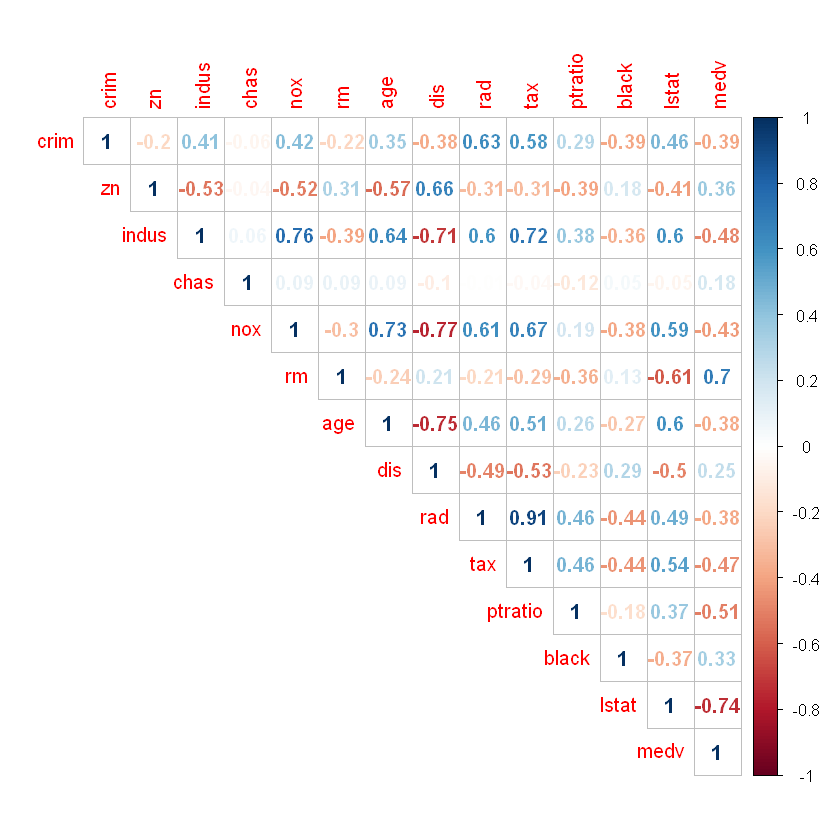

In [2]:
library(corrplot)

corr_matrix<-cor(Boston)
options(repr.plot.width=7, repr.plot.height=7)
corrplot(corr_matrix, type="upper", method = "number")

#### From the correlation matrix:

1. Median value of owner-occupied homes (**mdev**)
    - Increases as average number of rooms per dwelling (**rm**) increases
            A house with more rooms is usually more expensive
    - Decreases as percent of lower status population (**lstat**) in the area increases 
            Houses are cheaper when there are more people that 
            cannot afford an expensive house (no demand for expensive huses)
2. Full-value property-tax rate (**tax**)
    - Increases as index of accessibility to radial highways (**rad**) increases
            Access to more highways raises the taxes which make sense because 
            the municipality is investing more money (in higeways) in this area
    - Increases as proportion of non-retail business acres per town (**indus**) increases
            Maybe more businesses needs more maintenence (cleaning, infrastructure, etc..)
            by the municipality, so it needs more money
3. Weighted mean of distances to five Boston employment centres (**dis**)
    - Decreases as proportion of non-retail business acres per town (**indus**) increases
            There are more non-retail business as you get closer to commercial centers
    - Decreases as nitrogen oxides concentration (**nox**) (Air pollution) increases
            There is more nitrogen oxides (air pollution) as you get closer to commercial centers
    - Decreases as proportion of owner-occupied units built prior to 1940 (**age**) increases
            Probably new business owners prefered to open their businesses in areas that
            was already assosiated as commercial centers (because the old businesses)
4. Nitrogen oxides concentration (**nox**) (Air pollution)
    - Increases as proportion of non-retail business acres per town (**indus**)
            There is more nitrogen oxides (air pollution) as you get closer to commercial centers
    - Increases as proportion of owner-occupied units built prior to 1940 (**age**)
            There are more commercial centers around old businneses (which we saw in the previous point)
            so there are more air pollution

### Median value of owner-occupied homes to the explenatory variables plots

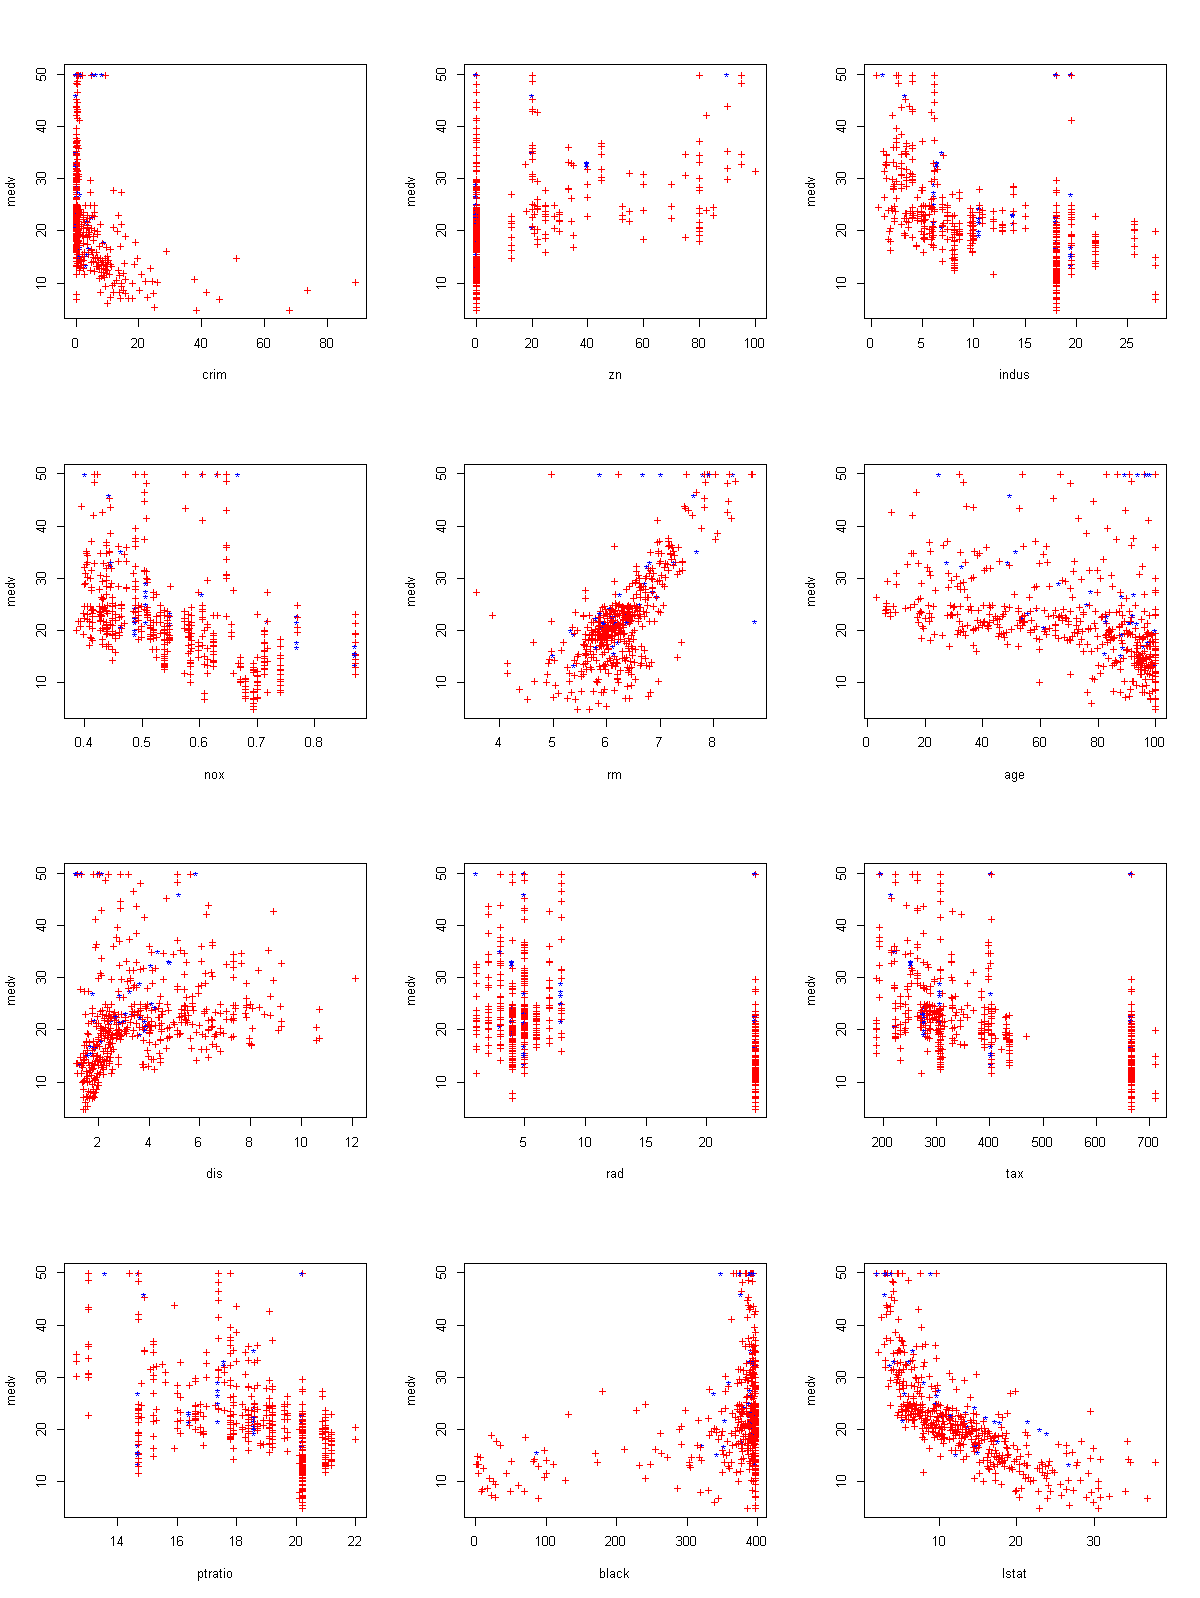

In [3]:
# Define color for each of the 2 categories
colors <- c("Red", "Blue")
colors <- colors[boston$chas]

# Define shapes
shapes = c('+', '*') 
shapes <- shapes[boston$chas]

options(repr.plot.width=10, repr.plot.height=3.33*4)
par(mfrow = c(4,3))
plot(medv ~ crim , data = boston, col=colors, pch=shapes)
plot(medv ~ zn, data = boston, col=colors, pch=shapes)
plot(medv ~ indus, data = boston, col=colors, pch=shapes)
# plot(medv ~ chas, data = boston, col=colors, pch=shapes)
plot(medv ~ nox, data = boston, col=colors, pch=shapes)
plot(medv ~ rm, data = boston, col=colors, pch=shapes)
plot(medv ~ age, data = boston, col=colors, pch=shapes)
plot(medv ~ dis, data = boston, col=colors, pch=shapes)
plot(medv ~ rad, data = boston, col=colors, pch=shapes)
plot(medv ~ tax, data = boston, col=colors, pch=shapes)
plot(medv ~ ptratio, data = boston, col=colors, pch=shapes)
plot(medv ~ black, data = boston, col=colors, pch=shapes)
plot(medv ~ lstat, data = boston, col=colors, pch=shapes)

#### From the plots
1. Seems like there are more crime in areas with lower median value of owner-occupied homes (**medv**)
2. We can see the good relation between **medv** to the explenatory variables **lstat** and **rm** as presented in the correlation matrix section
3. Seems like there are more cheaper houses in areas with a lot of owner-occupied units built prior to 1940 (**age**), probably because there are more old areas among those areas
4. Seems like most of the samples are from areas with low black ratio (black is between 300 and 400 when bk is between 0 and 0.08) 
5. The following variables seems to have a polinomial relation to **medv**:
    - crim - 2nd degree
    - indus - 2nd degree
    - lstat - 2nd degree
    - dis - 3rd degree
    
    It may be worth to try and add their polinomial effect

## Split randomly (why?) the data into a training and test sets of 80% and 20% of the data respectively. 
- Put a test set meanwhile aside and consider a training set

We split the data randomly to get an equal data distribution in both, the train and test sets.

We don't want to train only on certain types of samples and not see at all some other types which will end in overfitting the model to the sample types in the trian set

In [4]:
set.seed(123)
train.indexes <- sample(nrow(boston), nrow(boston) * 0.80)
boston.train <- boston[train.indexes, ]
boston.test <- boston[-train.indexes, ]

### Start from the main effects model, verify its adecuacy.


#### Main effect model

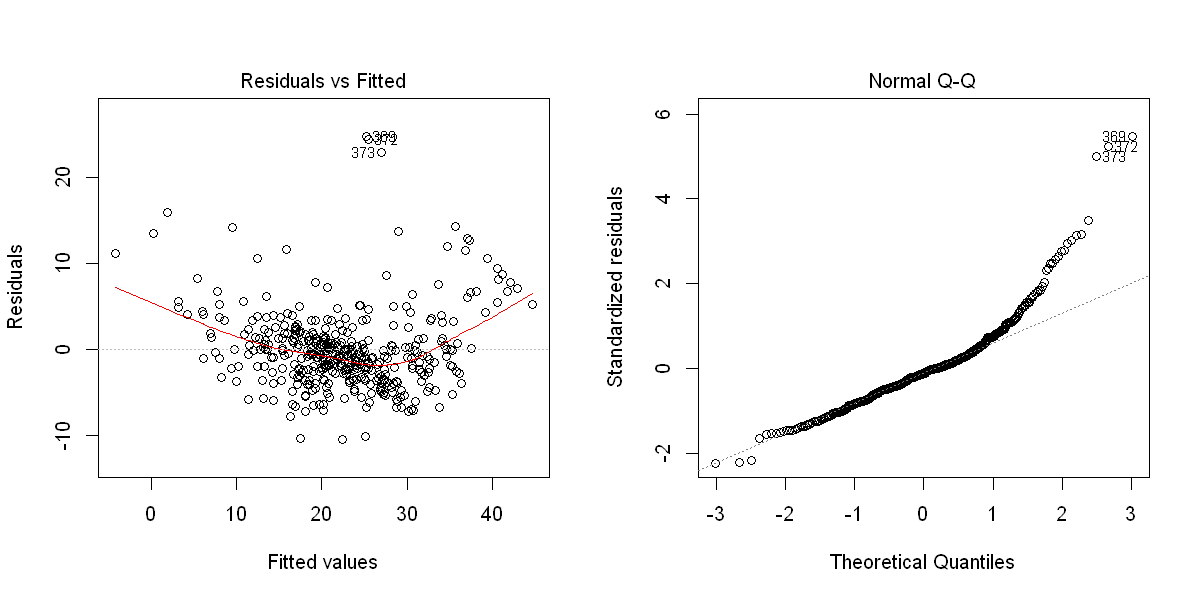

In [5]:
lm.maineffects.fit <- lm(medv ~ ., data = boston.train)
# summary(lm.maineffects.fit)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.maineffects.fit, which = 1:2)

#### Main effect model - summary
1. All the explenatory variables are significant except **age** and **indus**, but we know that these variables are higly correlated with each other and other variables such as **nox** and **dis** so we'll not remove them yet.
2. R squared is not very good but fair (0.7441)
3. From the residuals vs fitted plot:
    - The residuals assumtions are clearly not met
    - The square trend maybe hints that we forgot an explanatory variable (interaction? squared variable?)
    - We may need a transformation
4. From the Q-Q plot:
    - Seems like the residuals distribution has a "shorter" right tail which means also that out residuals normality assumption doesn't met

#### Main effect model with polinomial effects

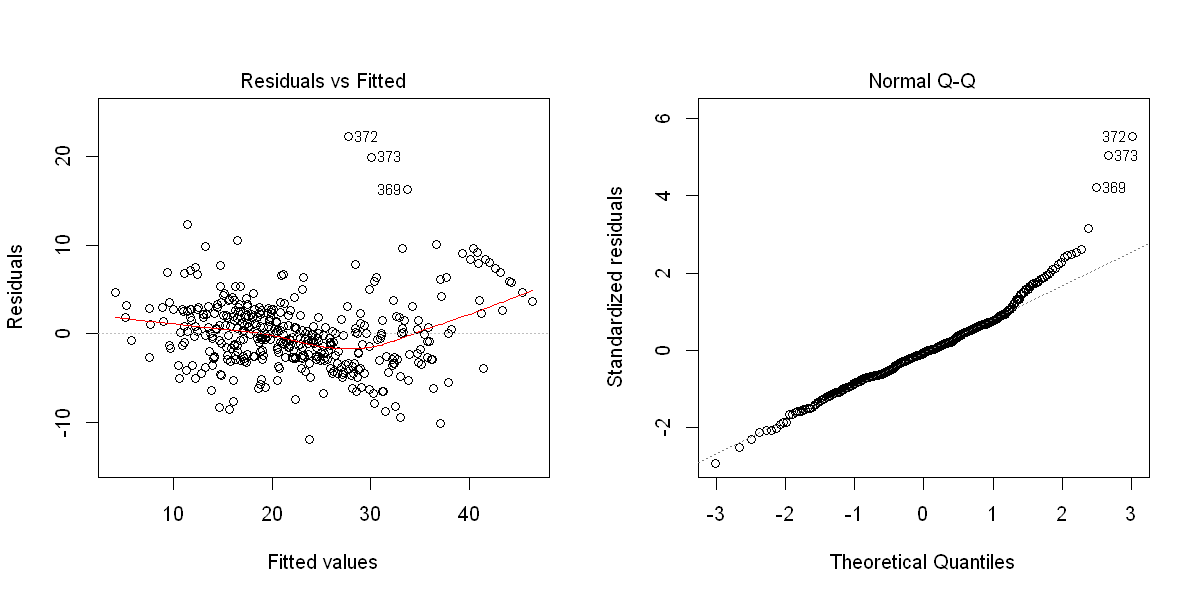

In [6]:
lm.poly.fit <- lm(
    medv ~ . + I(crim^2) + I(indus^2) + I(lstat^2) + I(dis^2) + I(dis^3), 
    data = boston.train)
# summary(lm.poly.fit)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.poly.fit, which = 1:2)

#### Main effect model with polinomial effects - summary
1. Now **age** is significant, but **indus** and it's squared effect are not significant. All the rest of the variables are significant.
2. R squared is better (0.807 vs 0.7441), but we added more explanatory variables so this is not a good evidence of improvment
3. From the residuals vs fitted plot:
    - The residuals assumtions are yet not met but better
    - The square trend releaxed a bit but we still may missing interactions
    - We still may need a transformation
4. From the Q-Q plot:
    - Got better but still not perfect.

##### Test if the polinomial effects are dependant on medv
Let's test the hypothesis:

$$
H_0: \beta_{lstat^2} = \beta_{crim^2} = \beta_{indus^2} = \beta_{dis^2} = \beta_{dis^3} = 0
$$

In [7]:
anova(lm.maineffects.fit, lm.poly.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
390,8729.934,NA,NA,NA,NA
385,6584.015,5,2145.919,25.0965,6.581013e-22


We will reject $H_0$ and conclude that the polinomial effects coefficients are not equal to zero

## If you're not satisfied, try to add paired interactions, perform transformations if necessary.

### Boxcox transformation for the dependant variable

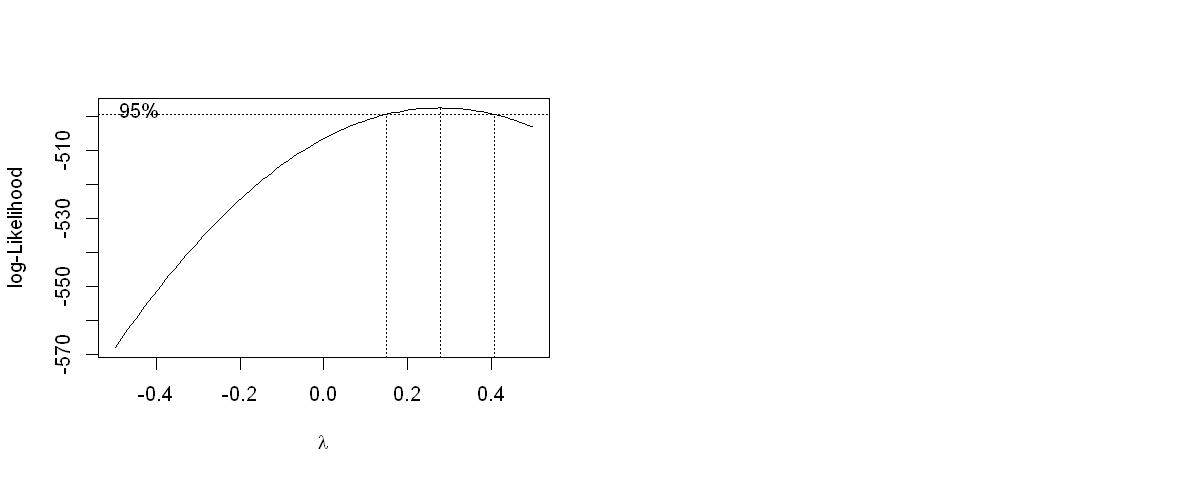

In [8]:
options(repr.plot.width=10, repr.plot.height=4)
par(mfrow = c(1,2))

boxcox(lm.poly.fit, lambda = seq(-0.5, 0.5, 1/10), plotit = TRUE, 
       eps = 1/50, xlab = expression(lambda), ylab = "log-Likelihood")

For both models, 4th root transformation may be a good transformation: $\sqrt[4]{medv}$

#### Main effect model with  4th root transformation - summary
Compared to the untransformed main effect model:
1. No difference in coeeficients significance
2. R squared is a bit better (0.7914 vs 0.7441)
3. Residuals:
    - The residuals assumtions are a bit better but still doesn't met

#### Polinomial model with  4th root transformation

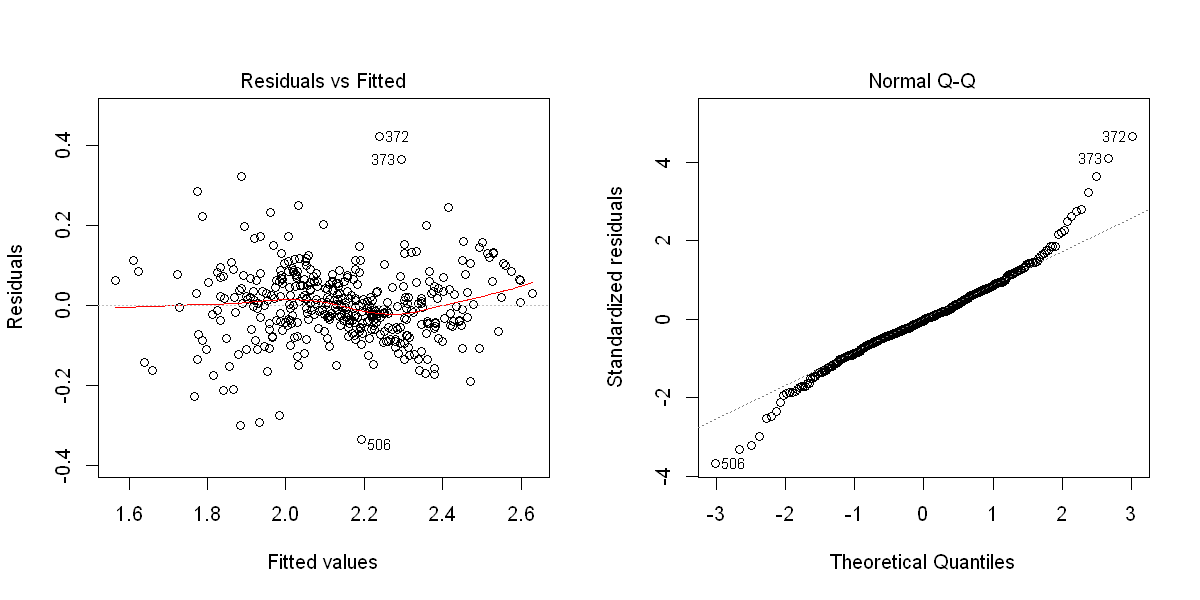

In [9]:
lm.poly.trans.fit <- lm(
    medv^0.25 ~ . + I(crim^2) + I(indus^2) + I(lstat^2) + I(dis^2) + I(dis^3), 
    data = boston.train)
# summary(lm.poly.trans.fit)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.poly.trans.fit, which = 1:2)

#### Polinomial model with  4th root transformation - summary
1. **indus** and **dis** polinomial effects are not significat now
2. R squared is a bit better compared to the untransformed polinomial model (0.8255 vs 0.807)
3. Residuals:
    - The residuals zero mean assumption is much better now.
    - We may need to add interactions

### Adding paired interactions
- We'll now add all the paired interactions and try to reduce the model later

#### Polinomial model with all the paired interactions

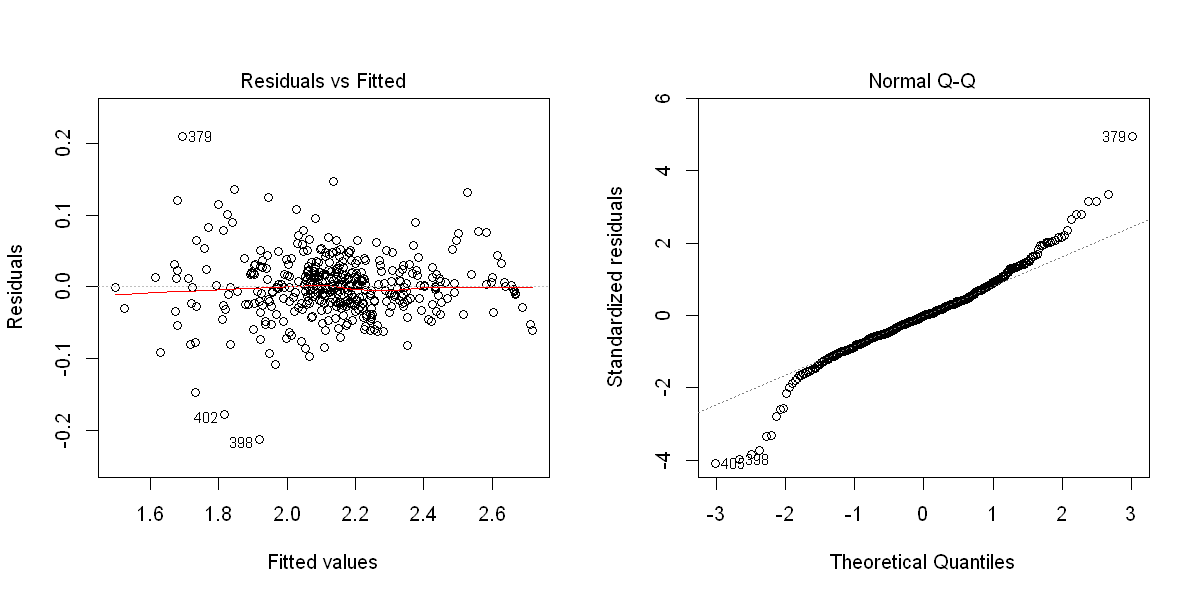

In [10]:
lm.poly.trans.int.fit <- lm(
    medv^0.25 ~ (. + I(crim^2) + I(indus^2) + I(lstat^2) + I(dis^2) + I(dis^3))^2, 
    data = boston.train)
# summary(lm.poly.trans.int.fit)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.poly.trans.int.fit, which = 1:2)

#### Polinomial model with all the paired interactions - summary
1. We have 172 coefficients - most of them are not significant which is not supprosing since they are higly correlated
2. R squared is fantastic! (0.9612) which is also not supprosing since we added **A LOT** of explanatory variables
3. From the residuals vs fitted plot:
    - Great! Now the zero mean assumption on the residuals seems to met
4. From the Q-Q plot:
    - We are not much normal - more like t distribution

## Perform model selection w.r.t. various model selection criteria. 
- Compare the resulting models
- Comment the results

### AIC
Running on the transformed polinomial model.

Starting from a model with all the paired interactions

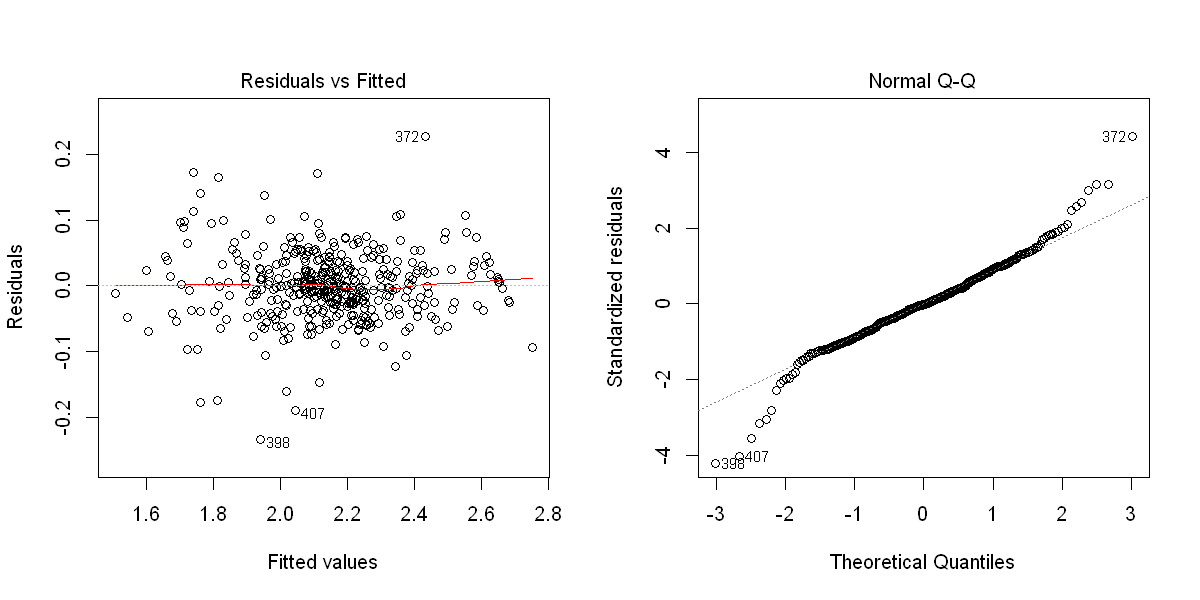

In [11]:
mod.aic <- stepAIC(lm.poly.trans.fit,
                   scope=list(upper= medv ~ .^2, lower= ~1), 
                   direction = "both",
                   trace=F,
                   k=2)
# summary(mod.aic)
# length(mod.aic$coefficients)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(mod.aic, which = 1:2)

#### AIC - summary
1. AIC has selected **62** variables
2. R squared is fantastic! (0.942)
3. From the residuals vs fitted plot:
    - The zero mean assumption on the residuals still met (except few outliers)
4. From the Q-Q plot:
    - Better, more normal than before but still has tails like t distribution

### BIC
Running on the transformed polinomial model.

Starting from a model with all the paired interactions

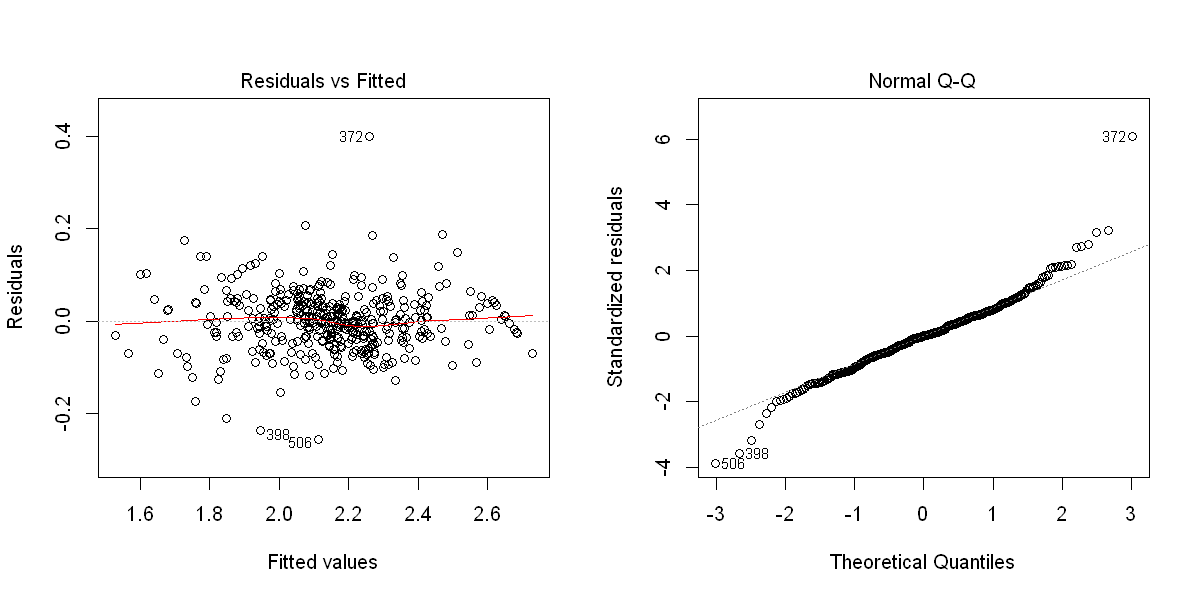

In [12]:
n=nrow(boston.train)

mod.bic <- stepAIC(lm.poly.trans.fit,
                   scope=list(upper= medv ~ .^2, lower= ~1), 
                   direction = "both",
                   trace=F,
                   k=log(n))
# summary(mod.bic)
# length(mod.bic$coefficients)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(mod.bic, which = 1:2)

#### BIC - summary
1. BIC has selected **27** variables
2. R squared is fantastic also here (0.9102) - less that AIC, but using less then half of the variables
3. From the residuals vs fitted plot:
     - The zero mean assumption on the residuals still met (except few outliers)
4. From the Q-Q plot:
    - Similar to AIC - still has tails like t distribution

### RIC
Running on the transformed polinomial model.

Starting from a model with all the paired interactions

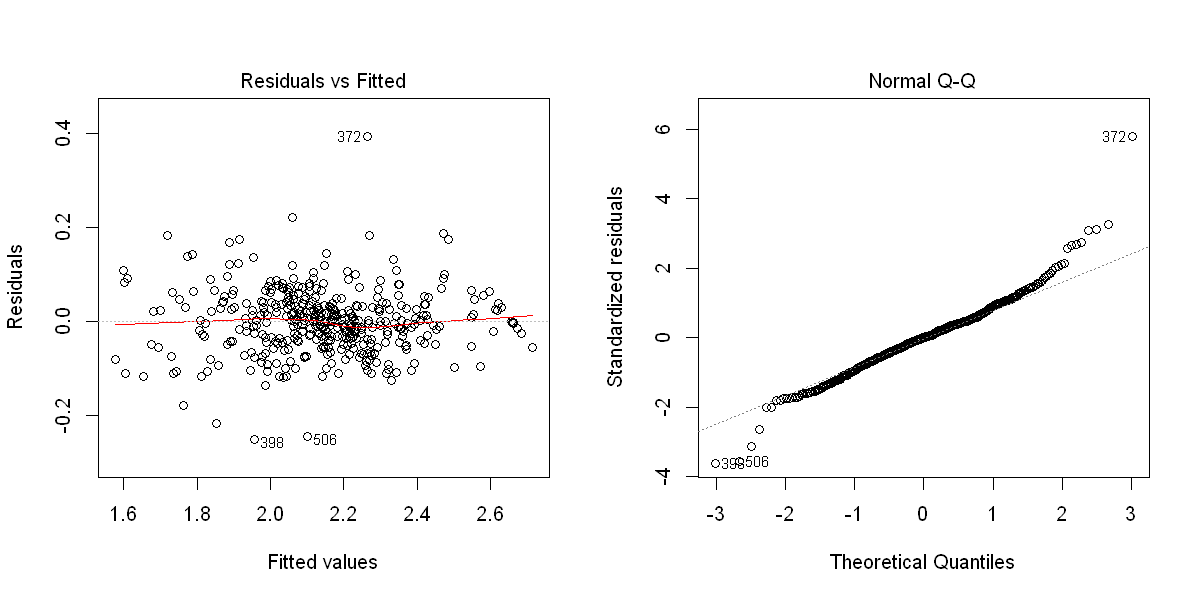

In [13]:
p=length(lm.poly.trans.int.fit$coefficients)-1

mod.ric <- stepAIC(lm.poly.trans.fit,
                   scope=list(upper= medv ~ .^2, lower= ~1), 
                   direction = "both",
                   trace=F,
                   k=2*log(p))

# summary(mod.ric)
# length(mod.ric$coefficients)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(mod.ric, which = 1:2)

#### RIC - summary
1. RIC has selected **23** variables
2. R squared is fantastic also here (0.9032) - less that AIC & BIC, but using less variables
3. From the residuals vs fitted plot:
    - The zero mean assumption on the residuals still met (except few outliers)
4. From the Q-Q plot:
    - Also similar to AIC & BIC - still has tails like t distribution

### Lasso
Running on the transformed polinomial model.

Starting from a model with all the paired interactions

Loading required package: Matrix
Loaded glmnet 3.0-1



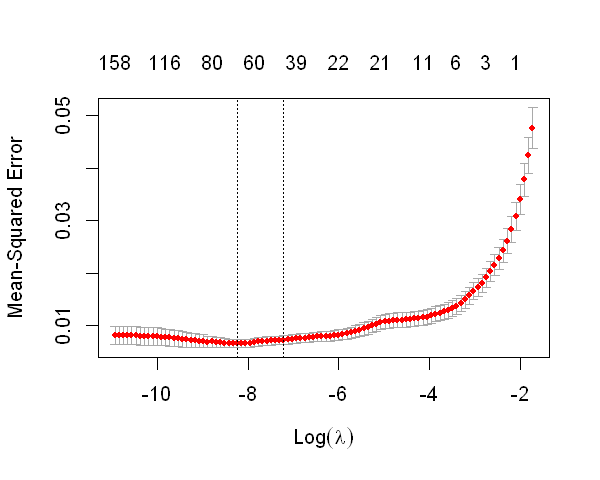

In [14]:
library(glmnet)

X.lasso <- model.matrix(lm.poly.trans.int.fit)

mod.cv.lasso <- cv.glmnet(X.lasso,
                          boston.train$medv^0.25, #Use a transformed medv
                          alpha=1,
                          nfolds=nrow(X.lasso), #Choose lambda using LOO CV
                          grouped=FALSE)

options(repr.plot.width=5, repr.plot.height=4)
plot(mod.cv.lasso)

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient


[1] 0.9186955

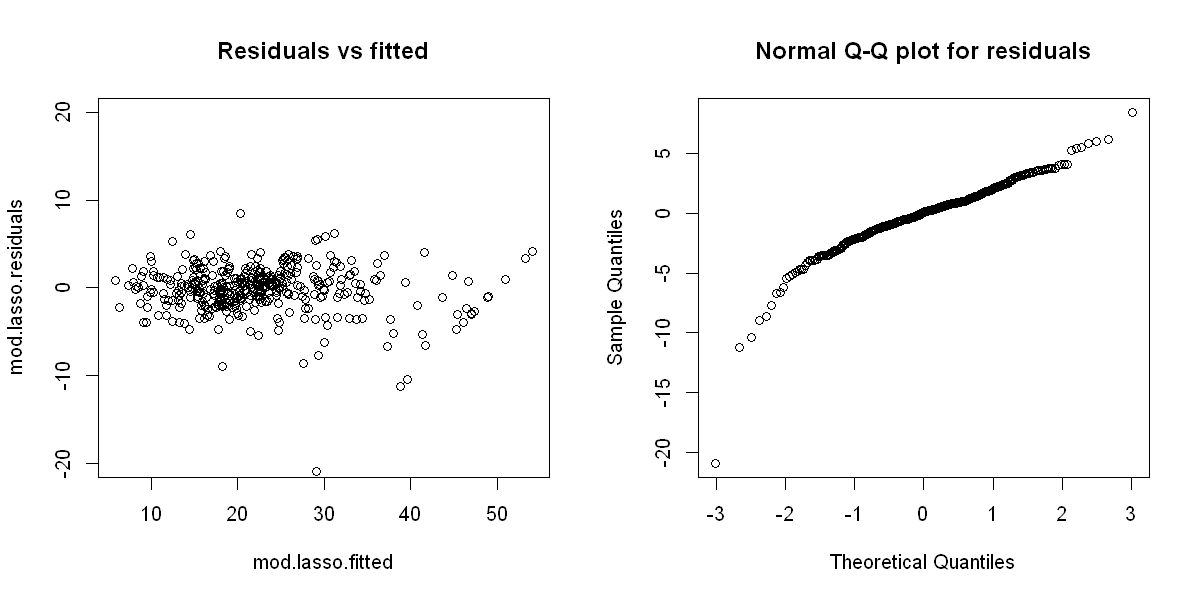

In [15]:
mod.lasso <- glmnet(X.lasso, boston.train$medv^0.25,alpha=1,lambda=mod.cv.lasso$lambda.min)

mod.lasso.fitted = predict(mod.lasso, X.lasso)^4
mod.lasso.residuals = mod.lasso.fitted - boston.train$medv

# number of coefficients selected by lasso
non.zero.indexes = mod.lasso$beta[, 1] != 0
mod.lasso.length <- length(mod.lasso$beta[non.zero.indexes])

mod.lasso.R2 <- cor(boston.train$medv, as.numeric(mod.lasso.fitted))^2
mod.lasso.R2

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(mod.lasso.fitted, mod.lasso.residuals, ylim = c(-20,20), main = "Residuals vs fitted")
qqnorm(mod.lasso.residuals, main = "Normal Q-Q plot for residuals")

#### Lasso - summary
1. RIC has selected **66** variables
2. R squared is fantastic also here (0.9186)
3. The residuals are not perfect

### PCR
Using a polinomial model with all the paired interactions

In [16]:
library(pls)

mod.pcr = pcr(medv^0.25 ~ (. + I(crim^2) + I(indus^2) + I(lstat^2) + I(dis^2) + I(dis^3))^2, 
              data=boston.train, scale=T, validation="LOO")

# summary(mod.pcr)


Attaching package: 'pls'

The following object is masked from 'package:corrplot':

    corrplot

The following object is masked from 'package:stats':

    loadings



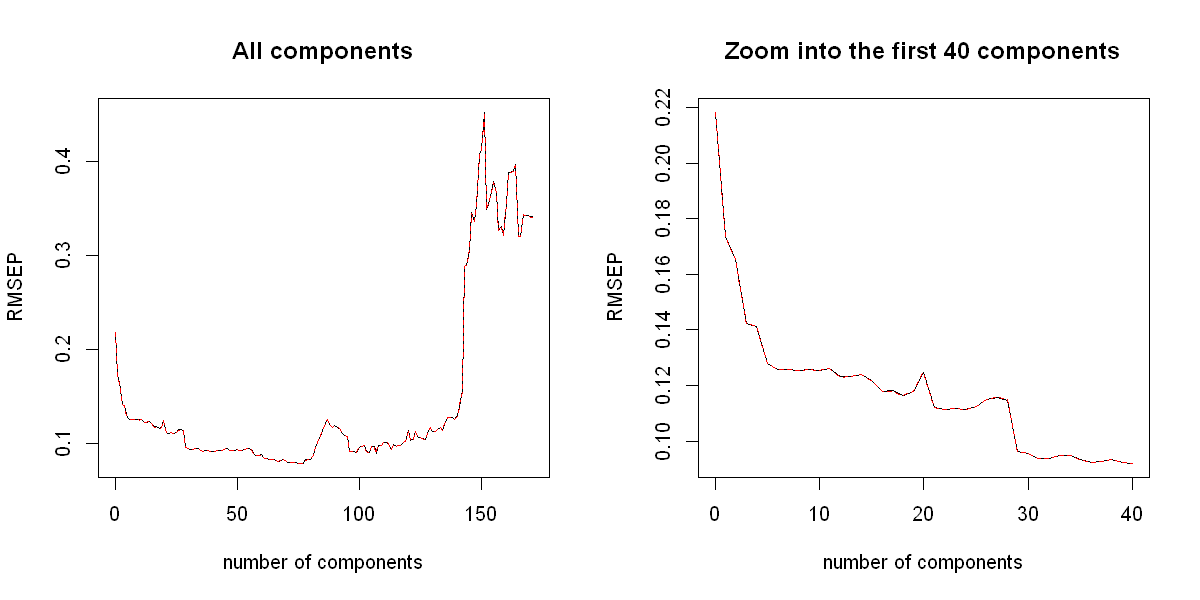

In [17]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
validationplot(mod.pcr, main="All components")
validationplot(mod.pcr, ncomp = 1:40, main="Zoom into the first 40 components")

##### PCR - Summary
- The best CV value achieved using **76** components (0.07918), but from **29** components (CV=0.09620) the improvment is negligible.
- In addition, 29 components explain 99.05% of Xvariance
- Projecting the data on the first 29 eigenvectors will significantly reduce the data dimensions and will explain most of it's variance 
- We know there is a problem with modeling the data using PCR such as it doesn't take the response variable (**medv**) in consideration

### PLS
Using a polinomial model with all the paired interactions

In [18]:
mod.pls = plsr(medv^0.25 ~ (. + I(crim^2) + I(indus^2) + I(lstat^2) + I(dis^2) + I(dis^3))^2, 
              data=boston.train, scale=T, validation="LOO")

# summary(mod.pls)

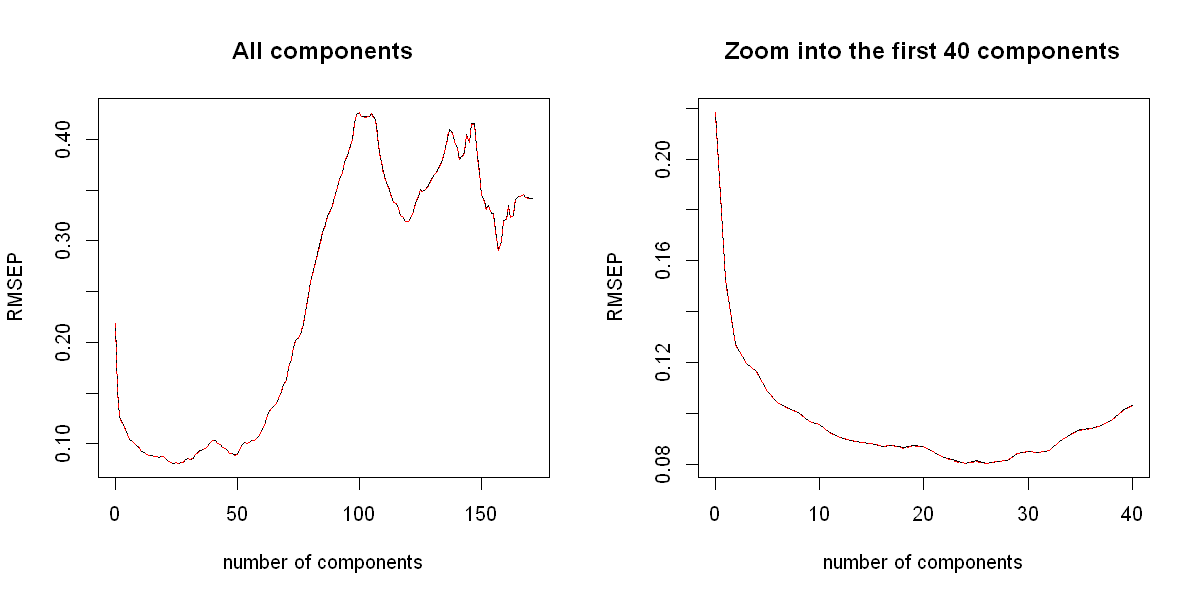

In [19]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
validationplot(mod.pls, main="All components")
validationplot(mod.pls, ncomp = 1:40, main="Zoom into the first 40 components")

##### PLS - Summary
- The best CV value achieved using **24** components (0.08052).
- In addition, 24 components explain 97.15% of Xvariance
- Projecting the data on the first 24 eigenvectors will significantly reduce the data dimensions and will explain most of it's variance 

## Test and compare the goodness-of-fit of those models on the test set. 
- Comment the results
- choose the 'final' model and explain it.

### Models comparision
**We'll compare the models using:**
1. **CV** - Leave one out cross validation
2. **GCV** - Generalized cross validation
3. **R2CV** - Squared corelation between the response variable to the coressponding LOO predicted vector
4. **MSPE** - Mean square prediction error **using the test data**
5. **Size** - Number of the variables used by the model 

**NOTE** $\rightarrow$ The comparision will be made on the original scale

#### Functions for calculating the above

In [20]:
none <- function(x){ return (x)}
power.4 = function(x){return (x^4)}

mspe <- function(lm.object, un.trans = none, testdata = boston.test, ...){
    # Computes the mean square prediction error
    pred.test <- un.trans(predict(lm.object, testdata, ...))
    mspe <- as.numeric(mean((pred.test - boston.test$medv) ^ 2))
    
    return (round(cbind(mspe), 4))
}

In [21]:
lm.crossVal <- function(lm.object, un.trans = none)
{
    # Computes the cross-validation (CV), the generalized cross-validation (GCV) and the cross-validation correlation coefficient (R^2_{CV}) for the specified linear model
    res.1 <- lm.object$residuals
    y <- un.trans(lm.object$fitted.values + lm.object$residuals)
    res <- y - un.trans(lm.object$fitted.values)
    h <- lm.influence(lm.object)$hat
    n <- length(y)
    cv <- mean(res^2/(1 - h)^2)
    gcv <- (n * sum(res^2))/lm.object$df^2
    r2cv <- cor(y, y - res/(1 - h))^2
    return(round(cbind(cv, gcv, r2cv), 4))
}

In [22]:
pls.crossVal <- function(pls.object, p, un.trans = none)
{
    # Computes the cross-validation (CV), the generalized cross-validation (GCV) and the cross-validation correlation coefficient (R^2_{CV}) for the specified PLS model
    y <- un.trans(pls.object$fitted.values[,,][,p] + pls.object$residuals[,,][,p])
    res <- y - un.trans(pls.object$fitted.values[,,][,p])
    
    n <- length(y)
    
    # CV
    press = sum((un.trans(pls.object$validation$pred[,,][,p]) - y)^2)
    cv = press/n

    # GCV
    rss = sum(res^2)
    gcv = (n/(n-p)^2)*rss

    # R2CV
    r2cv = cor(y, un.trans(pls.object$validation$pred[,,][,p]))^2

    return(round(cbind(cv, gcv, r2cv), 4))
}

In [23]:
mod.size <- function(mod){
    return (length(mod$coefficients))
}

In [24]:
lm.maineffect.crossVal <- lm.crossVal(lm.maineffects.fit)
lm.poly.crossVal <- lm.crossVal(lm.poly.fit)
lm.poly.trans.crossVal <- lm.crossVal(lm.poly.trans.fit, un.trans = power.4)
lm.poly.trans.int.crossVal <- lm.crossVal(lm.poly.trans.int.fit, un.trans = power.4)
mod.aic.crossVal <- lm.crossVal(mod.aic, un.trans = power.4)
mod.bic.crossVal <- lm.crossVal(mod.bic, un.trans = power.4)
mod.ric.crossVal <- lm.crossVal(mod.ric, un.trans = power.4)
mod.pcr.crossVal <- pls.crossVal(mod.pcr, 29, un.trans = power.4)
mod.pls.crossVal <- pls.crossVal(mod.pls, 24, un.trans = power.4)

In [25]:
lm.maineffect.mspe <- mspe(lm.maineffects.fit)
lm.poly.mspe <- mspe(lm.poly.fit)
lm.poly.trans.mspe <- mspe(lm.poly.trans.fit, un.trans = power.4)
lm.poly.trans.int.mspe <- mspe(lm.poly.trans.int.fit, un.trans = power.4)
mod.aic.mspe <- mspe(mod.aic, un.trans = power.4)
mod.bic.mspe <- mspe(mod.bic, un.trans = power.4)
mod.ric.mspe <- mspe(mod.ric, un.trans = power.4)
mod.pcr.mspe <- mspe(mod.pcr, un.trans = power.4, ncomp=29)
mod.pls.mspe <- mspe(mod.pls, un.trans = power.4, ncomp=24)

Warning message in predict.lm(lm.object, testdata, ...):
"prediction from a rank-deficient fit may be misleading"

In [26]:
#calculate lasso CV
# lambda.cv.index = which(mod.cv.lasso$lambda == mod.cv.lasso$lambda.min)
# mod.lasso.cv = mod.cv.lasso$cvm[lambda.cv.index][[1]]

#calculate lasso GCV
mod.lasso.rss = sum((predict(mod.lasso, X.lasso)^4 - boston.train$medv)^2)
n = nrow(X.lasso)
p = mod.lasso.length
mod.lasso.gcv = round((n/(n-p)^2)*mod.lasso.rss, 4)

#calculate lasso R2CV
mod.lasso.cv.pred <- lapply(1:nrow(X.lasso), function(i){
    fit <- glmnet(as.matrix(X.lasso[-i,]),
                boston.train$medv[-i]^0.25,
                alpha = 1,
                lambda = mod.cv.lasso$lambda.min)
    pred <- predict(fit, t(X.lasso[i,]))[1]^4

    return(pred)
})
mod.lasso.r2cv = round(cor(boston.train$medv, as.numeric(mod.lasso.cv.pred))^2, 4)

#calculate lasso CV
mod.lasso.cv = round(sum(as.numeric(mod.lasso.cv.pred) - boston.train$medv)^2/n, 4)

#calculate lasso MSPE
newx <- model.matrix(as.formula(medv^0.25 ~ (. + I(crim^2) + I(indus^2) + I(lstat^2) + I(dis^2) + I(dis^3))^2), boston.test)
mod.lasso.mspe <- mspe(mod.lasso, testdata = newx, un.trans = power.4)

In [27]:
options(scipen=999)
results <- rbind(
    cbind(lm.maineffect.crossVal, lm.maineffect.mspe, mod.size(lm.maineffects.fit)),
    cbind(lm.poly.crossVal, lm.poly.mspe, mod.size(lm.poly.fit)),
    cbind(lm.poly.trans.crossVal, lm.poly.trans.mspe, mod.size(lm.poly.trans.fit)),
    cbind(lm.poly.trans.int.crossVal, lm.poly.trans.int.mspe, mod.size(lm.poly.trans.int.fit)),
    cbind(mod.aic.crossVal, mod.aic.mspe, mod.size(mod.aic)),
    cbind(mod.bic.crossVal, mod.bic.mspe, mod.size(mod.bic)),
    cbind(mod.ric.crossVal, mod.ric.mspe, mod.size(mod.ric)),
    cbind(mod.lasso.cv, mod.lasso.gcv, mod.lasso.r2cv, mod.lasso.mspe, mod.lasso.length),
    cbind(mod.pcr.crossVal, mod.pcr.mspe, 29),
    cbind(mod.pls.crossVal, mod.pls.mspe, 24)
    
)

In [28]:
models = c(
    "Main effect",
    "Polinomial effects",
    "Polinomial 4th root transformed",
    "Polinomial and interactions transformed",
    "AIC",
    "BIC",
    "RIC",
    "Lasso",
    "PCR",
    "PLS"
)

comparision <- as.data.frame(cbind(models, results))
names(comparision) <- c("model", "CV", "GCV", "R2cv", "MSPE", "Size")

comparision[order(comparision$MSPE),]

,model,CV,GCV,R2cv,MSPE,Size
5,AIC,7.254,6.2406,0.9143,11.3871,62
8,Lasso,6.553,9.9088,0.8715,11.8316,66
7,RIC,9.7129,8.969,0.8852,11.8507,23
6,BIC,9.4054,8.719,0.8888,12.7963,27
10,PLS,11.342,7.7941,0.8663,12.9068,24
3,Polinomial 4th root transformed,17.1092,16.687,0.7985,18.8912,19
9,PCR,16.4079,15.2476,0.8065,19.4128,29
2,Polinomial effects,18.5488,17.9453,0.7805,19.5318,19
4,Polinomial and interactions transformed,81.6144,7.9461,0.5026,21.811,172
1,Main effect,23.8818,23.188,0.7174,23.6786,14


#### Selected model
The selected model is the RIC model:

- The RIC model has a very good MSPE value (negligable difference from the minimal MSPE) **while the number of variables used in this model is fairly small (only 23)**
- In "goodness of fit" terms:
    - It is not the best but very satisfying
    - Also the residuals assumptions in this model seems to by met (except few outliers)